[-1.0, 0.0]
[(-1.00000000000000, 0.0)]
[-x]
[0.0, 1.0]
[(-1.00000000000000, 0.0), (0.0, 1.00000000000000)]
[-x, exp(x)]
Periodo
2.00000000000000
L
1.00000000000000
a0


2.21828182845905

an


2.71828182845905*(-1.0)**n/(9.86960440108936*n**2 + 1.0) + 0.101321183642338*(-1.0)**n/n**2 - 1.0/(9.86960440108936*n**2 + 1.0) - 0.101321183642338/n**2

bn


-8.53973422267357*(-1.0)**n*n/(9.86960440108936*n**2 + 1.0) + 0.318309886183791*(-1.0)**n/n + 3.14159265358979*n/(9.86960440108936*n**2 + 1.0)

fourier_series


Sum((-8.53973422267357*(-1.0)**n*n/(9.86960440108936*n**2 + 1.0) + 0.318309886183791*(-1.0)**n/n + 3.14159265358979*n/(9.86960440108936*n**2 + 1.0))*sin(pi*n*x) + (2.71828182845905*(-1.0)**n/(9.86960440108936*n**2 + 1.0) + 0.101321183642338*(-1.0)**n/n**2 - 1.0/(9.86960440108936*n**2 + 1.0) - 0.101321183642338/n**2)*cos(pi*n*x), (n, 1, 100)) + 1.10914091422952

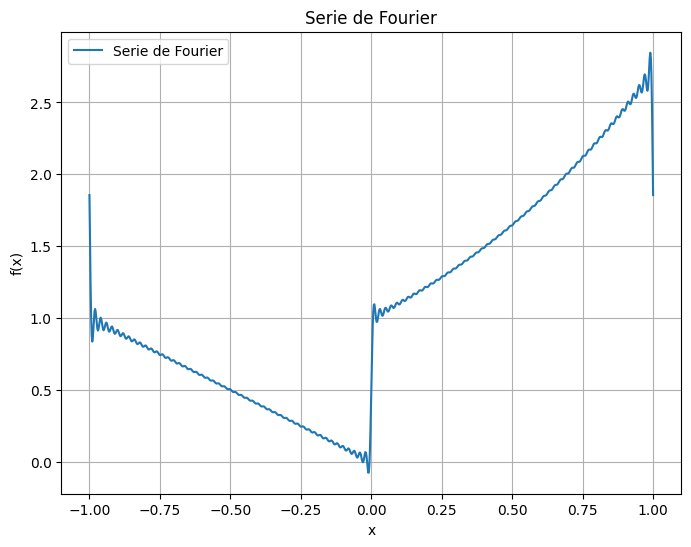

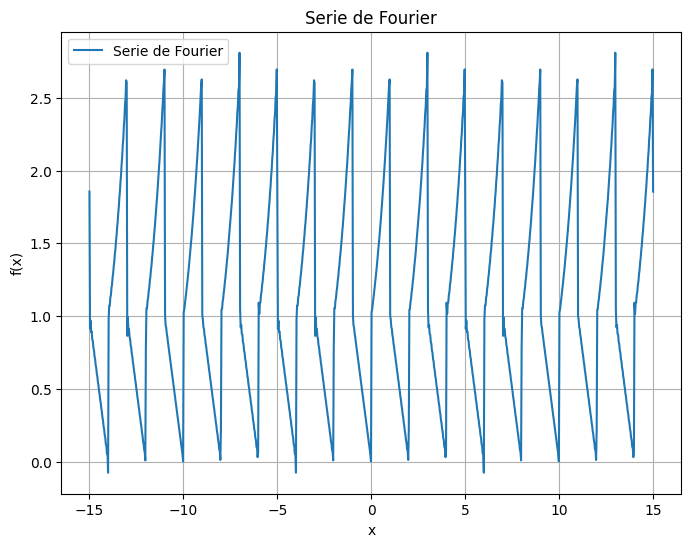

In [20]:
#Proyecto final
import sympy as sp                  #Ingreso, contension y transformaciones para el  uso dedatos
import numpy as np
import matplotlib.pyplot as plt




#--------------------------------------------------------------------------------------------------------------------------------

                  #Solicitar funciones e intervalos al usuario y contenerlos adecuadamente para sus futuras operaciones

x = sp.symbols('x')

# Solicitar al usuario el número de intervalos
num_intervalos = int(input("Ingrese el número de intervalos para su función a trozos: "))
#Guarda la info como cadenas de caracteres es decir secuencias de texto encerradas entre comillas
# Procesar los intervalos ingresados por el usuario
funciones = []
intervalos = []
suma_total = 0
#[] representan listas vacias
Tipo_de_intervalo = []
cerrado = "<=x<="
abierto = "<x<"
semi_abierto_derecha ="<=x<"
semi_abierto_izquierda="<x<="

#Transformar la lista

for i in range(num_intervalos): #[2]=0 1 o [5]= 0 1 2 3 4 
    intervalo_str = input(f"Ingrese el intervalo para la función {i + 1}: ")

    # Dividir el intervalo en límites, considerando diferentes patrones
    if '<=x<=' in intervalo_str:
        limites = [float(valor) for valor in intervalo_str.split('<=x<=')] # ["0", "5"]
        Tipo_de_intervalo.append("cerrado")
    elif '<x<=' in intervalo_str:
        limites = [float(valor) for valor in intervalo_str.split('<x<=')]
        Tipo_de_intervalo.append("semi_abierto_izquierda")
    elif '<x<' in intervalo_str:
        limites = [float(valor) for valor in intervalo_str.split('<x<')]
        Tipo_de_intervalo.append("abierto")
    elif '<=x<' in intervalo_str:
        limites = [float(valor) for valor in intervalo_str.split('<=x<')]
        Tipo_de_intervalo.append("semi_abierto_derecha")
    
    print(limites)
    # Convertir a expresiones sympy y evaluar los límites
    limite_inf = sp.sympify(limites[0])
    limite_sup = sp.sympify(limites[1])
    
    intervalos.append((limite_inf, limite_sup))
    print(intervalos)
    # Solicitar al usuario la función para el intervalo dado
    funcion_str = input(f"Ingrese la función para el intervalo {intervalo_str}: ")
    funcion = sp.sympify(funcion_str)
    funciones.append(funcion)
    print(funciones)
    
#Datos relevantes
#Para encontrar el periodo P se tiene:
limites_inferiores = [lim[0] for lim in intervalos]
limites_superiores = [lim[1] for lim in intervalos]

limite_mayor_intervalos = max(max(limites_inferiores), max(limites_superiores))
limite_menor_intervalos = min(min(limites_inferiores), min(limites_superiores))

P=limite_mayor_intervalos-limite_menor_intervalos
print("Periodo")
print(P)
#Para encontrar L
#P=2L ---> P/2=L
L=P/2
print("L")
print(L)
#--------------------------------------------------------------------------------------------------------------------------------

#                                    Cálculo de los coeficientes a0, an y bn para la serie de Fourier

#--------------------------------------------------------------------------------------------------------------------------------

                                 #Generalizar la integral para la funcion sea o no sea a trozos

#Para encontrar a0

# Realizar la integración en cada intervalo
for i in range(len(funciones)):
    integral = sp.integrate(funciones[i], (x, intervalos[i][0], intervalos[i][1])).evalf()
    suma_total += integral  # Acumular la integral actual a la suma total
    
a0 = (1/L)*suma_total
print("a0")
display(a0)

#--------------------------------------------------------------------------------------------------------------------------------

N = 100  # Número de términos
n = sp.symbols('n', integer=True, positive=True)

                                                        # Para encontrar an
suma_total_an = 0
for i in range(len(funciones)):
    integral_an = sp.integrate(funciones[i]*sp.cos(n*sp.pi*x/L), (x, intervalos[i][0], intervalos[i][1])).evalf()
    suma_total_an += integral_an  # Acumular la integral actual a la suma total

an = (1/L)*suma_total_an
print("an")
display(an)

#--------------------------------------------------------------------------------------------------------------------------------

                                                        # Para encontrar bn
suma_total_bn = 0
for i in range(len(funciones)):
    integral_bn = sp.integrate(funciones[i]*sp.sin(n*sp.pi*x/L), (x, intervalos[i][0], intervalos[i][1])).evalf()
    suma_total_bn += integral_bn  # Acumular la integral actual a la suma total
    
#--------------------------------------------------------------------------------------------------------------------------------

                                                     #Para encontrar b0
bn = (1/L)*suma_total_bn
print("bn")
display(bn)
# Expresión de la serie de Fourier
fourier_series = a0/2 + (sp.Sum(an * sp.cos(n*sp.pi*x/L) + bn * sp.sin(n*sp.pi*x/L), (n, 1, N)))
print("fourier_series")
display(fourier_series)

#---------------------------------------------------------------------------------------------------------------------------------

                                                 #Graficar la serie de Fourier de -L a L

# Convertir los límites inferiores y superiores a valores numéricos
limite_menor_num = float(limite_menor_intervalos)
limite_mayor_num = float(limite_mayor_intervalos)

# Crear una secuencia de valores de x para evaluar la serie de Fourier
x_vals = np.linspace(limite_menor_num, limite_mayor_num, 1000)

# Definir la serie de Fourier como una función numérica
fourier_fn = sp.lambdify(x, fourier_series)

# Evaluar la serie de Fourier en los valores de x
y_vals = fourier_fn(x_vals)

# Graficar la serie de Fourier
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='Serie de Fourier')
plt.title('Serie de Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
#---------------------------------------------------------------------------------------------------------------------------------

                                      #Graficar la serie de Fourier de -L a L periodicamente
Limite_menor_grafica = -15
Limite_mayor_grafica = 15

x_vals1 = np.linspace(Limite_menor_grafica, Limite_mayor_grafica, 1000)

# Definir la serie de Fourier como una función numérica
fourier_fn = sp.lambdify(x, fourier_series)

# Evaluar la serie de Fourier en los valores de x
y_vals1 = fourier_fn(x_vals1)

# Graficar la serie de Fourier
plt.figure(figsize=(8, 6))
plt.plot(x_vals1, y_vals1, label='Serie de Fourier')
plt.title('Serie de Fourier')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
#--------------------------------------------------------------------------------------------------------------------------------

                                                #Datos con los que se puede Jugar
#N = 100  # Número de términos de la sumatoria
#Limite_menor_grafica = -15
#Limite_mayor_grafica = 15

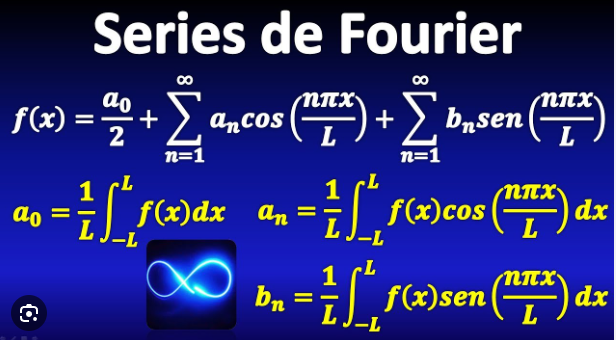